# Reddit authorization using Praw API

Getting comments from posts under a specific subreddit, then creates a sentimental analysis report of those comments

In [1]:
!pip install praw
import praw
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from textblob import TextBlob #textblob visualizer
import re #regex for cleaning text
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk')

In [2]:
import json

CLIENT_ID = ''
CLIENT_SECRET = ''
USERNAME = ''
PASSWORD = ''
USER_AGENT = ''

API_file_path = 'D:/API Keys/Reddit_API.json'

with open(API_file_path, 'r') as f:
  keyData = json.load(f)
  CLIENT_ID = keyData['CLIENT_ID']
  CLIENT_SECRET = keyData['CLIENT_SECRET']
  USERNAME = keyData['USERNAME']
  PASSWORD = keyData['PASSWORD']
  USER_AGENT = keyData['USER_AGENT']

CLIENT_ID = CLIENT_ID
CLIENT_SECRET = CLIENT_SECRET
USERNAME = USERNAME
PASSWORD = PASSWORD
USER_AGENT = USER_AGENT

try:
    reddit = praw.Reddit(client_id=CLIENT_ID, client_secret=CLIENT_SECRET, username=USERNAME, password=PASSWORD, user_agent=USER_AGENT)
    print("Authentication Successful")
except:
    # reset all credentials
    CLIENT_ID = ''
    CLIENT_SECRET = ''
    USERNAME = ''
    PASSWORD = ''
    USER_AGENT = ''
    print("Error: Authentication Failed")

Authentication Successful


In [3]:
input_subreddit = input("Please input the name of the subreddit: ")

# analyze movies subreddit
subreddit = reddit.subreddit(input_subreddit).hot(limit=100)

Please input the name of the subreddit: movies


In [4]:
# create pandas dataframe
posts = []

for post in subreddit:
  posts.append([post.title, post.score, post.id, post.selftext, f"reddit.com{post.permalink}", post.num_comments])
posts = pd.DataFrame(posts,columns=['Title', 'Score', 'ID', 'Text', 'Post URL', 'Total Comments'])
posts

,Title,Score,ID,Text,Post URL,Total Comments
0,Official Discussion Megathread (Infinity Pool ...,121,10nqysf,[Infinity Pool](https://www.reddit.com/r/movie...,reddit.com/r/movies/comments/10nqysf/official_...,0
1,What is the Best Film You Watched Last Week? (...,7,10qxhu6,The way this works is that you post a review o...,reddit.com/r/movies/comments/10qxhu6/what_is_t...,23
2,First Image of Sydney Sweeney as Real-Life U.S...,4236,10qv6vl,,reddit.com/r/movies/comments/10qv6vl/first_ima...,525
3,‘The Batman Part II’ Sets October 2025 Release...,14384,10q48lk,,reddit.com/r/movies/comments/10q48lk/the_batma...,1058
4,New Image of Adam Driver as Enzo Ferrari in Mi...,91,10r0kmh,,reddit.com/r/movies/comments/10r0kmh/new_image...,33
...,...,...,...,...,...,...
95,Communication Breakdown movie Plots Rant,0,10qmufh,Idk if this is the right sub and sorry this is...,reddit.com/r/movies/comments/10qmufh/communica...,2
96,Any movie that you feel is ruined by a single ...,478,10p8d76,I can't imagine many. There are so many great ...,reddit.com/r/movies/comments/10p8d76/any_movie...,1729
97,Scene from a James Wan movie…?,0,10qmm3x,"Aight so if anybody can help me here, I’d real...",reddit.com/r/movies/comments/10qmm3x/scene_fro...,2
98,Discussion: Bitter Moon 1992 vs The Vanishing ...,1,10qi2r2,Discussion: Bitter Moon 1992 vs The Vanishing ...,reddit.com/r/movies/comments/10qi2r2/discussio...,2


In [5]:
from praw.models import MoreComments
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get comments for each post
post_comments = []
all_comments = []
ID = []

print("This can take a while...")

for post_id,post_url in zip(posts['ID'], posts['Post URL']):
  print(post_url)

  comment_text = ""

  # creating a submission object
  submission = reddit.submission(id=post_id)

  # take all comments of each submission
  submission.comments.replace_more(limit=5)
  for submission_comment in submission.comments:

    comment_text = f"{comment_text} {submission_comment.body}"

    all_comments.append(submission_comment.body)
    ID.append(post_id)
  
  post_comments.append(comment_text)

# creating a new dataframe of the comments
df_comments = pd.DataFrame(post_comments, columns=['comment'])

data_tuple = list(zip(all_comments, ID))
df_all_comments = pd.DataFrame(data_tuple, columns=['comment', 'ID'])

df_comments

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


This can take a while...
reddit.com/r/movies/comments/10nqysf/official_discussion_megathread_infinity_pool_you/
reddit.com/r/movies/comments/10qxhu6/what_is_the_best_film_you_watched_last_week/
reddit.com/r/movies/comments/10qv6vl/first_image_of_sydney_sweeney_as_reallife_us/
reddit.com/r/movies/comments/10q48lk/the_batman_part_ii_sets_october_2025_release_date/
reddit.com/r/movies/comments/10r0kmh/new_image_of_adam_driver_as_enzo_ferrari_in/
reddit.com/r/movies/comments/10qq1pi/what_are_some_movies_with_messages_that_are/
reddit.com/r/movies/comments/10pzw6v/danny_trejo_joel_mchale_join_scifi_comedy_tim/
reddit.com/r/movies/comments/10q5hbc/official_poster_for_fast_x/
reddit.com/r/movies/comments/10qwhip/your_favorite_gangster_film_that_rarely_gets/
reddit.com/r/movies/comments/10r1vug/james_mangold_being_considered_for_dc_movie_swamp/
reddit.com/r/movies/comments/10q49ad/dc_slate_unveiled_new_batman_supergirl_movies_a/
reddit.com/r/movies/comments/10q2phg/official_poster_for_champion

,comment
0,
1,I watched Heat with Al Pacino and Robert De N...
2,Her name is Reality Winner and she has two mo...
3,>\tWhile Gunn and Safran are developing a new...
4,I feel like wig departments in film have eith...
...,...
95,but stuff like this happens in real life. I d...
96,The fake baby in “American Sniper”. Terrible ...
97,The first Conjuring movie. Oldest daughter ge...
98,I saw Bitter Moon when it came out. I don’t r...


# Data preprocessing

In [6]:
# checking that all of the comments are shown correctly
df_all_comments

,comment,ID
0,I watched Heat with Al Pacino and Robert De Ni...,10qxhu6
1,"I watched a few good films this week, doesn't ...",10qxhu6
2,**The Outfit** (2022) A short and sweet unique...,10qxhu6
3,TRAINSPOTTING - I'd always known this film fro...,10qxhu6
4,I'm learning German so I've been watching a lo...,10qxhu6
...,...,...
6218,"I see your point. However, I loved Mare of Eas...",10qvrv4
6219,Kate has always been a fantastic actress! I th...,10qvrv4
6220,I feel like She's always been a solid actress....,10qvrv4
6221,I don’t really see much difference in her role...,10qvrv4


In [7]:
df_comments['comment'][3]

' >\tWhile Gunn and Safran are developing a new DC Universe, which includes the 2025 theatrical release “Superman: Legacy,” Reeves’ “The Batman Part II” will remain a standalone property and fall under the newly branded “DC Elseworlds” category. Gunn announced that any DC film or television series that is set outside of the main DC Universe will get the “DC Elseworlds” tag, exactly how DC Comics functions.\n\nhonestly, this is the best of both worlds for me.  Reeves gets to keep his own Batman series and expand and upon that, but we’ll still get a unified series of interconnected flicks with Gunn’s work.  Granted, they already sort of did this with Joker and the first Batman, but at least they’re making better efforts for the “DCU”(?) I read this article and saw the words “Superman: Legacy,” Reeves’" and had something very different in mind. Great idea to just let things be “elseworlds”. Like personally I don’t even need a shared universe, just cool unique stories based on what the cre

In [8]:
from nltk.corpus import stopwords
# cleaning comment so that it will be appropriate to analyze
stop = stopwords.words('english')

def clean_comments(comment):
  c = comment
  c = re.sub(r'\n+', '', c)
  c = re.sub(r'\'', '', c)
  c = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", comment)
  c = c.strip().lower()
  c = " ".join([word for word in c.split() if word not in (stop)])
  return c

comment_cleaned = []

for comment in df_all_comments['comment']:
  cleaned = clean_comments(comment)

  comment_cleaned.append(cleaned)

# make new dataframe for the cleaned comments 
df_cleaned = pd.DataFrame(comment_cleaned, columns=['comment'])
# drop rows which is just an empty string and then reset index
df_cleaned = df_cleaned[df_cleaned.comment != ''].reset_index()
df_cleaned

,index,comment
0,0,watched heat al pacino robert de niro ever see...
1,1,watched good films week compare last week none...
2,2,outfit 2022 short sweet unique gem crafty scre...
3,3,trainspotting always known film afar important...
4,4,learning german watching lot german language m...
...,...,...
6196,6218,see point however loved mare easttown winning ...
6197,6219,kate always fantastic actress think post oscar...
6198,6220,feel like always solid actress oscar pre post
6199,6221,really see much difference role selection pre ...


In [9]:
df_cleaned['comment'][3]

'trainspotting always known film afar important cultural object possibly reason never much interest digging deeper topic drug addicts seemed like real drag jokes since drab dour drug drama expecting 90 minute electric shock heart much viscerally portrays worst aspects hard drug culture never loses humor energy entertaining us way shit hole much maligned 20 year later sequel good'

In [10]:
# Make dataframe into list for it to be tokenizable
df_cleanedList = list(df_cleaned['comment'])
df_cleanedList = ' '.join(df_cleanedList)
df_cleanedList

'watched heat al pacino robert de niro ever seen many years ago damn forgotten good genuine modern classic great acting thrilling bank robbery goes wrong much recommended anyone seen especially likes crime thrillers watched good films week compare last week nonetheless help 2021 great indie film jodie comer stephen graham fan continuous takes film one goes 23 minutes intense throughout great characters know takes place care home young woman comer starts working covid hits see struggles face made respect even reminded even though see friends much months vacation comparison key workers experienced graham plays man alzheimer living facility know putting watching characters horrible illness 3 5 stars babylon 2022 despite lot reviews really loved agreed statements feeling bit long third act losing momentum opening scene 30 minutes long title card appears fantastic know hammed bit movie goers sure much stuff actually happened funny thinking actors time really think like wish got manny absolu

# Tokenization, Lemmatization and Frequency Distribution

In [11]:
from nltk.probability import FreqDist
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

# Tokenize words
tokens = word_tokenize(df_cleanedList)

lemmatized_tokens = []
# Lemmatize words
lemmatizer = WordNetLemmatizer()
for token in tokens:
  lemmatized_tokens.append(lemmatizer.lemmatize(token))

# Show frequency of words
fd = FreqDist(lemmatized_tokens)

fd

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\janne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\janne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\janne\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


FreqDist({'movie': 1924, 'like': 790, 'one': 718, 'film': 649, 'time': 539, 'good': 387, 'get': 381, 'would': 376, 'really': 370, 'think': 358, ...})

 movie   like    one   film   time   good    get  would really  think 
  1924    790    718    649    539    387    381    376    370    358 


<AxesSubplot: xlabel='Frequency'>

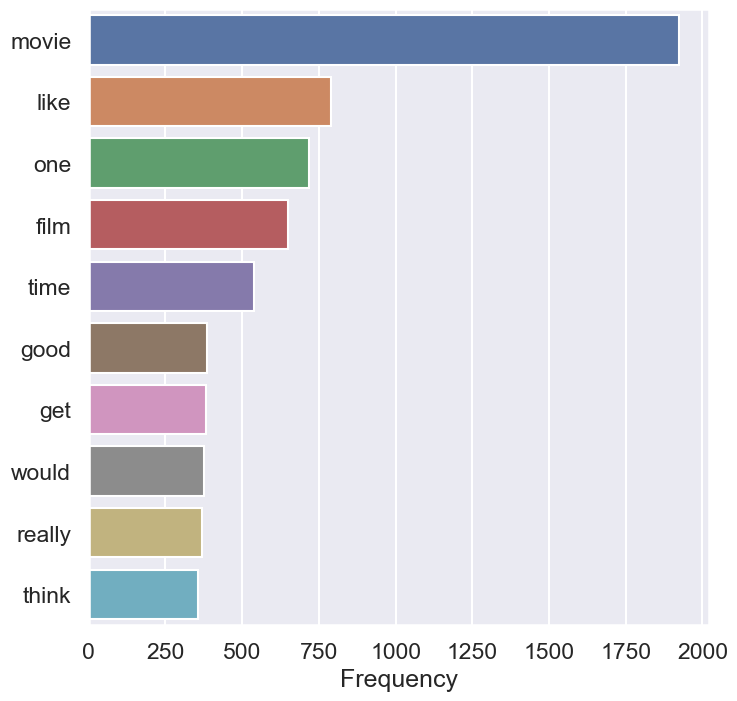

In [12]:
cleanWords = nltk.Text(lemmatized_tokens)
cleanWords.vocab().tabulate(10)


df_fdist = pd.DataFrame.from_dict(fd, orient='index')
df_fdist.columns = ['Frequency']
df_fdist = df_fdist.nlargest(10, 'Frequency')
df_fdist.index


# create a visualization of the first 10 most used words
fig, ax = plt.subplots(figsize=(8, 8))

df_fdist.columns
sns.barplot(x=df_fdist['Frequency'], y=df_fdist.index)


# N-grams
Searching for most common trigrams used

In [13]:
from nltk.collocations import TrigramCollocationFinder

words = [w for w in cleanWords if w.isalpha()]
finder = TrigramCollocationFinder.from_words(words)

# Find the 20 most common trigrams
finder.ngram_fd.most_common(20)

[(('end', 'road', 'begin'), 30),
 (('one', 'hit', 'wonder'), 28),
 (('favorite', 'movie', 'time'), 20),
 (('hot', 'shot', 'part'), 19),
 (('kentucky', 'fried', 'movie'), 18),
 (('shot', 'part', 'deux'), 16),
 (('hot', 'shot', 'hot'), 16),
 (('shot', 'hot', 'shot'), 16),
 (('fast', 'ten', 'seatbelt'), 15),
 (('country', 'old', 'men'), 14),
 (('jar', 'jar', 'binks'), 12),
 (('comic', 'book', 'movie'), 11),
 (('batman', 'v', 'superman'), 11),
 (('gang', 'new', 'york'), 11),
 (('one', 'favorite', 'movie'), 11),
 (('bad', 'boy', 'life'), 10),
 (('first', 'time', 'saw'), 10),
 (('empire', 'strike', 'back'), 10),
 (('white', 'boy', 'day'), 10),
 (('kung', 'fu', 'hustle'), 9)]

# Sentiment Analysis

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\janne\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
df_cleaned

,index,comment
0,0,watched heat al pacino robert de niro ever see...
1,1,watched good films week compare last week none...
2,2,outfit 2022 short sweet unique gem crafty scre...
3,3,trainspotting always known film afar important...
4,4,learning german watching lot german language m...
...,...,...
6196,6218,see point however loved mare easttown winning ...
6197,6219,kate always fantastic actress think post oscar...
6198,6220,feel like always solid actress oscar pre post
6199,6221,really see much difference role selection pre ...


In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

positive = []
negative = []
neutral = []
compound = []

for comment in df_cleaned['comment']:

  positive.append(sia.polarity_scores(comment)['pos'])
  negative.append(sia.polarity_scores(comment)['neg'])
  neutral.append(sia.polarity_scores(comment)['neu'])
  compound.append(sia.polarity_scores(comment)['compound'])

df_cleaned['positive'] = positive
df_cleaned['negative'] = negative
df_cleaned['neutral'] = neutral
df_cleaned['compound'] = compound


In [17]:
df_cleaned

,index,comment,positive,negative,neutral,compound
0,0,watched heat al pacino robert de niro ever see...,0.322,0.226,0.452,0.5965
1,1,watched good films week compare last week none...,0.314,0.055,0.631,0.9941
2,2,outfit 2022 short sweet unique gem crafty scre...,0.413,0.048,0.539,0.9042
3,3,trainspotting always known film afar important...,0.181,0.253,0.566,-0.6854
4,4,learning german watching lot german language m...,0.237,0.125,0.638,0.8687
...,...,...,...,...,...,...
6196,6218,see point however loved mare easttown winning ...,0.290,0.061,0.649,0.8718
6197,6219,kate always fantastic actress think post oscar...,0.368,0.000,0.632,0.7906
6198,6220,feel like always solid actress oscar pre post,0.406,0.000,0.594,0.4767
6199,6221,really see much difference role selection pre ...,0.115,0.091,0.794,0.1531


In [18]:
# Make labels for the different results using compound, if positive = 1, if negative = -1, if neutral = 0
df_cleaned['label'] = 0
df_cleaned.loc[df_cleaned['compound'] > 0.2, 'label'] = 1
df_cleaned.loc[df_cleaned['compound'] < -0.2, 'label'] = -1


pos_total = df_cleaned.loc[df_cleaned['label'] == 1]
neg_total = df_cleaned.loc[df_cleaned['label'] == -1]
neu_total = df_cleaned.loc[df_cleaned['label'] == 0]
#total = pos_total + neg_total + neu_total
total = len(pos_total) + len(neg_total) + len(neu_total)

pos_ratio = len(pos_total)/total
neg_ratio = len(neg_total)/total
neu_ratio = len(neu_total)/total

# take only one decimal place
print("Percentage of comments which are considered positive: {:.1f} %".format(100.0*pos_ratio))

print("Percentage of comments which are considered negative: {:.1f} %".format(100.0*neg_ratio))

print("Percentage of comments which are considered neutral: {:.1f} %".format(100.0*neu_ratio))


Percentage of comments which are considered positive: 39.4 %
Percentage of comments which are considered negative: 23.2 %
Percentage of comments which are considered neutral: 37.3 %


In [19]:
df_cleaned

,index,comment,positive,negative,neutral,compound,label
0,0,watched heat al pacino robert de niro ever see...,0.322,0.226,0.452,0.5965,1
1,1,watched good films week compare last week none...,0.314,0.055,0.631,0.9941,1
2,2,outfit 2022 short sweet unique gem crafty scre...,0.413,0.048,0.539,0.9042,1
3,3,trainspotting always known film afar important...,0.181,0.253,0.566,-0.6854,-1
4,4,learning german watching lot german language m...,0.237,0.125,0.638,0.8687,1
...,...,...,...,...,...,...,...
6196,6218,see point however loved mare easttown winning ...,0.290,0.061,0.649,0.8718,1
6197,6219,kate always fantastic actress think post oscar...,0.368,0.000,0.632,0.7906,1
6198,6220,feel like always solid actress oscar pre post,0.406,0.000,0.594,0.4767,1
6199,6221,really see much difference role selection pre ...,0.115,0.091,0.794,0.1531,0


In [20]:
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

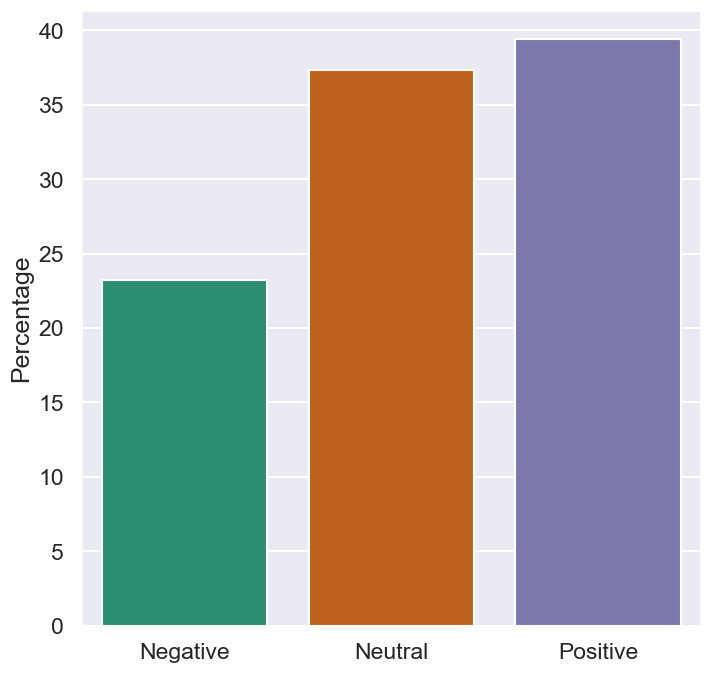

In [21]:
# visualize the percentages
fig, ax = plt.subplots(figsize=(8, 8))

counts = df_cleaned.label.value_counts(normalize=True) * 100.0

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()